<h2><center>Data Exploration</h2>
<center>This notebook is devoted in data exploration using mainly descriptive statistics, and at the end some usefull insights are given.</center>

In [18]:
import matplotlib.pyplot as plt 
from matplotlib import style  
style.use("ggplot")

import pandas as pd

from commons import load_data

In [19]:
# load data
filename = "data/traindata.csv"  # Load the folder path where the data are stored.
data = load_data(filename)       # The function load_data is declared in the file commons.py

<h3>Obtain some basic informations about the data - Understanding the Data</h3>

In [3]:
data.head(n=5) # Print the first 5 rows of the train data

,id,purpose_validated,dur_in_sec,hour_start,hour_end,day_of_month,week,dist_gtfsstops_all,dist_gtfsstops_train,dist_gtfsstops_tram,dist_gtfsstops_bus,day
0,0,home,1017.087000,8,9,2,5,126.188532,574.259045,10496.593564,126.188532,3
1,1,leisure,310.000000,0,0,14,2,411.478950,3388.489009,24408.713071,411.478950,6
2,2,leisure,4993.099000,16,17,23,51,242.799218,420.061325,242.799218,242.799218,4
3,3,errand,422.515001,11,11,29,26,73.118524,1757.238956,16999.384112,73.118524,3
4,4,leisure,9673.579000,18,21,28,4,644.638357,644.638357,45432.181046,2333.563174,5


In [4]:
data.describe()  # Plot some descriptive statistics concerning the training data

,id,dur_in_sec,hour_start,hour_end,day_of_month,week,dist_gtfsstops_all,dist_gtfsstops_train,dist_gtfsstops_tram,dist_gtfsstops_bus,day
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000
mean,2499.500000,12188.795896,12.34260,12.021200,15.944000,25.98580,2.053933e+05,2.071797e+05,2.472115e+05,2.096723e+05,2.910000
std,1443.520003,21162.431178,4.74111,4.735276,8.765742,16.66163,1.227586e+06,1.228677e+06,1.247714e+06,1.236469e+06,1.944905
min,0.000000,-171448.670000,0.00000,0.000000,1.000000,1.00000,2.069160e+00,2.270669e+00,5.101627e+00,2.069160e+00,0.000000
25%,1249.750000,705.143250,9.00000,9.000000,9.000000,11.00000,7.068524e+01,2.867855e+02,8.748413e+03,7.866506e+01,1.000000
50%,2499.500000,2946.173999,12.00000,12.000000,16.000000,25.00000,1.476482e+02,7.103714e+02,2.738575e+04,1.603210e+02,3.000000
75%,3749.250000,13265.155750,16.00000,16.000000,23.000000,41.00000,2.941565e+02,1.620603e+03,4.934939e+04,3.182313e+02,5.000000
max,4999.000000,252768.266000,23.00000,23.000000,31.000000,52.00000,1.454995e+07,1.454995e+07,1.482290e+07,1.469650e+07,6.000000


In [5]:
data.shape

(5000, 12)

In [20]:
# Turning the data into numpy format makes it easier to plot them.

#data.set_index("id", inplace=True) # use id as the index for the data
y_train =data['purpose_validated'].values       # Target values - numpy.ndarray
X_train = data.drop(['purpose_validated','id'],axis=1).values   # Features - numpy.ndarray

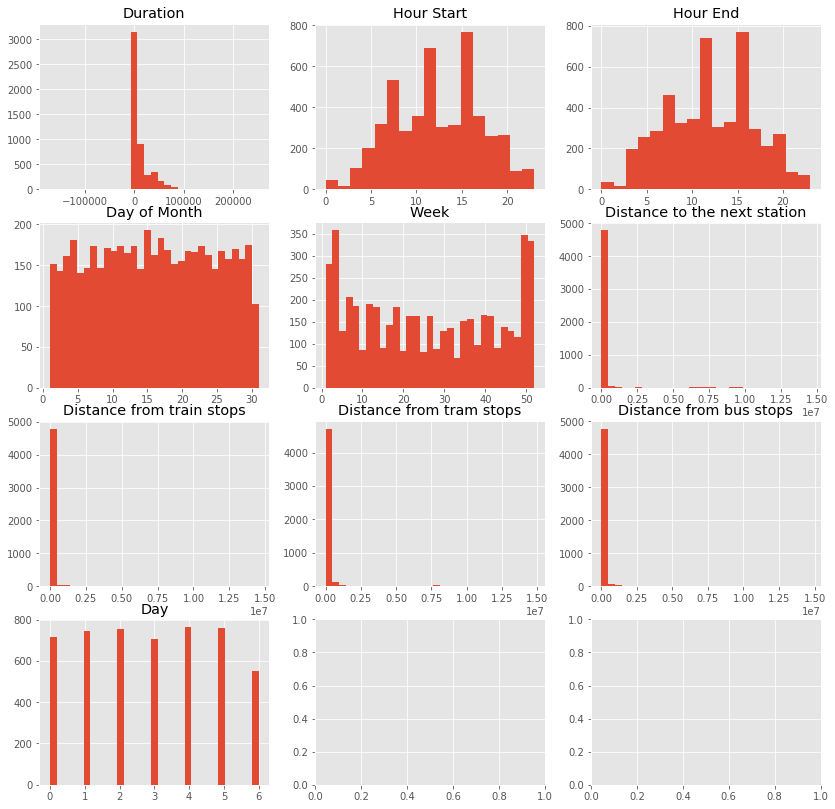

In [21]:
# Plot the Histogram of each feature

fig, ax = plt.subplots(4, 3, figsize=(14, 14))

num_bins = 31
    
ax[0, 0].hist(X_train[:,0], bins=num_bins,alpha=1)
ax[0, 0].set_title('Duration')

ax[0, 1].hist(X_train[:,1], bins=17,alpha=1)
ax[0, 1].set_title('Hour Start')

ax[0, 2].hist(X_train[:,2], bins=17,alpha=1)
ax[0, 2].set_title('Hour End')
    
ax[1, 0].hist(X_train[:,3], bins=num_bins,alpha=1)
ax[1, 0].set_title('Day of Month')

ax[1, 1].hist(X_train[:,4], bins=num_bins,alpha=1)
ax[1, 1].set_title('Week')

ax[1, 2].hist(X_train[:,5], bins=num_bins,alpha=1)
ax[1, 2].set_title('Distance to the next station')

ax[2, 0].hist(X_train[:,6], bins=num_bins,alpha=1)
ax[2, 0].set_title('Distance from train stops')

ax[2, 1].hist(X_train[:,7], bins=num_bins,alpha=1)
ax[2, 1].set_title('Distance from tram stops')

ax[2, 2].hist(X_train[:,8], bins=num_bins,alpha=1)
ax[2, 2].set_title('Distance from bus stops')

ax[3, 0].hist(X_train[:,9], bins=num_bins,alpha=1)
ax[3, 0].set_title('Day')

plt.show()

<h3> Check for possible null and zero values</h3>

In [22]:
data.isnull().sum()  # Check for null values

id                      0
purpose_validated       0
dur_in_sec              0
hour_start              0
hour_end                0
day_of_month            0
week                    0
dist_gtfsstops_all      0
dist_gtfsstops_train    0
dist_gtfsstops_tram     0
dist_gtfsstops_bus      0
day                     0
dtype: int64

In [23]:
(data == 0.0).sum()  # Check if there are zero values

id                        1
purpose_validated         0
dur_in_sec                0
hour_start               20
hour_end                 15
day_of_month              0
week                      0
dist_gtfsstops_all        0
dist_gtfsstops_train      0
dist_gtfsstops_tram       0
dist_gtfsstops_bus        0
day                     714
dtype: int64

<h3>Check for correlations between the features</h3>

In [24]:
data[['dur_in_sec', 'hour_start', 'hour_end', 'day_of_month', 'week', 'dist_gtfsstops_all', 'dist_gtfsstops_train', 'dist_gtfsstops_tram', 'dist_gtfsstops_bus','day']].corr()


,dur_in_sec,hour_start,hour_end,day_of_month,week,dist_gtfsstops_all,dist_gtfsstops_train,dist_gtfsstops_tram,dist_gtfsstops_bus,day
dur_in_sec,1.000000,0.224194,-0.220515,-0.007927,0.015725,-0.008629,-0.008777,-0.010179,-0.009067,0.007212
hour_start,0.224194,1.000000,0.426319,0.013333,0.015889,0.008136,0.008093,0.009862,0.009579,0.042415
hour_end,-0.220515,0.426319,1.000000,-0.004121,0.003794,0.013906,0.013845,0.013966,0.015425,0.044974
day_of_month,-0.007927,0.013333,-0.004121,1.000000,0.087928,-0.031001,-0.030982,-0.031551,-0.030976,-0.005529
week,0.015725,0.015889,0.003794,0.087928,1.000000,-0.021753,-0.021771,-0.022231,-0.021563,0.026511
dist_gtfsstops_all,-0.008629,0.008136,0.013906,-0.031001,-0.021753,1.000000,0.999980,0.999202,0.999851,-0.000632
dist_gtfsstops_train,-0.008777,0.008093,0.013845,-0.030982,-0.021771,0.999980,1.000000,0.999269,0.999820,-0.000150
dist_gtfsstops_tram,-0.010179,0.009862,0.013966,-0.031551,-0.022231,0.999202,0.999269,1.000000,0.999317,0.002178
dist_gtfsstops_bus,-0.009067,0.009579,0.015425,-0.030976,-0.021563,0.999851,0.999820,0.999317,1.000000,-0.001116
day,0.007212,0.042415,0.044974,-0.005529,0.026511,-0.000632,-0.000150,0.002178,-0.001116,1.000000


<h3> Plot the number of samples for each class</h3>

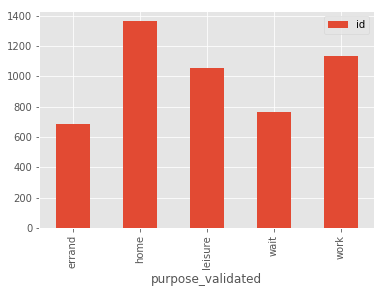

In [25]:
data[['id','purpose_validated']].groupby('purpose_validated').count().plot(kind='bar')

<h3>Results - Conclusions</h3>

<h6>Anomalies on the data</h6>
The feature 'dur_in_sec' has some easily detected anomalies such as the maximum value stands for 70 hours, which in a city scale analysis does not make sanse. Additionally, the minimum value is negative which also does not make sense. Animalies like thεse should be removed using an outlier detector. This might help the classifier to converge faster with better results.
<h6>On features scales</h6>
As can be seen from the histograms and the discriptive statistics, some features (continuous independent variables) are measured at different scales. This could lead the classification method to treat these variables as they do not give equal contribution to the analysis. Transforming the data to comparable scales can prevent this problem. A popular technique is called standardization which helps to rescale the variables in order to have equal range and/or variance.
<h6>On data's distribution</h6>
As shown in the histograms most of the features does not follow the normal distribution. Since most of the parametric classification algorithms (like SVM) assume that the data are normaly distributed, it could cause a problem. A possible solution would be the usage of a non parametric algorithms like Random Forest, which do not make any assumptions concerning the data.
<h6>On null and zero values</h6>
As it is shown above there are no null either zeros values.
<h6>On correlation between features</h6>
From one of the above tables can be illustrated that there is a strong correlation between the features 'hour_start' and 'hour_end'.
Additionally strong correlation is occured between the features concerning the distances from public transportation. Since some classification methods assume that the features of the training data are indepented it could be useful to apply a feature selection or a dimensionality technique like PCA.
<h6>On the number of samples form each class</h6>
From on of the above figures can be seen that some classes, like 'errand' consist of less samples in compare to others, so they are underepresented. Greater is the difference between the number of samples in each class, poorer are the classfication results. A commonly used technique to solve this issues is to oversample the data. After applying an oversampling technique the boundary decision becomes less biaised toward the majority class.
<h6>In general</h6>
From the above analisys it seems that there is a need to explore which of the features have a significant contribution and which of them don't. Apart from that, more features can derive from the given.